# Diseñar una cadena de Markov 

In [4]:
using PyPlot

INFO: Loading help data...


$\newcommand{\ss}{\pmb \sigma}
\newcommand{\tt}{\pmb \tau}
\newcommand{\pp}{\pmb \pi}$

Ahora estamos listos para poder ¡*simular el modelo de Ising a una temperatura $T$ fija*!
Ocuparemos todo lo que hemos visto hasta ahora en el curso.

La idea *genial*, que se ha redescubierto varias veces, es el de **diseñar una cadena de Markov**, es decir, diseñar su matriz de transición, tal que **su distribución estacionaria es la que queramos**. Llamaremos la distribución estacionaria $\pi(\ss)$.

En el caso de la física estadística, la distribución deseada es (por el momento) la de Boltzmann,

$$\pi(\ss) = \frac{1}{Z(\beta)} e^{-\beta E(\ss)}.$$

Pero en otros contextos, por ejemplo en la estadística (y posteriormente en el curso), podría interesarnos generar distintas distribuciones estacionarias.

La idea es, entonces, **diseñar** una matriz de transición $P(\ss \to \tt)$, la cual, recordemos, da las probabilidades de que la cadena, estando en el microestado (configuración) $\ss$, brinque al microestado $\tt$, con el fin de que la cadena de Markov correspondiente a esta matriz de transición tenga la distribución estacionaria $\pi(\ss)$ deseada.

Resta una sola pregunta: ¿cómo hacer esto?


## Balance detallado 

Recordemos de un notebook anterior que hay una condición *necesaria* para que la distribución de probabilidad $\pp$ sea una distribución estacionaria de la matriz de transición $\mathsf{P}$ con entradas $P(\ss \to \tt)$, llamada la *condición de balance*. 

Físicamente, la condición de balance expresa el hecho de que la cantidad de probabilidad que fluye de $\ss$ a todos los demás estados en un paso es la misma que la cantidad de probabilidad que fluye de todos los demás estados hacia $\ss$.

[1] Escribe la condición de balance usando esta notación.

$$\sum \limits_{\tau} \pi(\sigma)P(\sigma \rightarrow \tau)=\sum \limits_{\tau} \pi(\tau)P(\tau \rightarrow \sigma)$$

$$\pi(\sigma)=\sum \limits_{\tau} \pi(\tau)P(\tau \rightarrow \sigma)$$

Muchos métodos de Monte Carlo usan una condición más fuerte, que es *suficiente*, pero no *necesaria*, para que la distribución $\pi$ sea estacionaria para la cadena. Esta condición se llama la condición de **balance detallado**, y dice que el flujo de probabilidad de un estado $\ss$ a otro $\tt$ es igual al flujo al revés, de $\tt$ a $\ss$, para *cualquier* par de estados $\ss$ y $\tt$.

La condición de balance detallado se suele *imponer*, ya que hace más fácil derivar una cadena de Markov adecuada.

[2] (i) Escribe una fórmula para la condición de balance detallado.

$$\pi(\sigma)P(\sigma \rightarrow \tau)=\pi(\tau)P(\tau \rightarrow \sigma)$$

(ii) De ahí extrae una condición sobre las probabilidades de transición, en términos de las $\pi(\ss)$. 

(iii) En el caso de la distribución de Boltzmann, ¿qué pasa con la $Z$ en esta expresión? 

El punto que vimos en el 2(iii) es crucial -- quiere decir que **no es necesario conocer la constante de normalización de la distribución de probabilidad**.

## Metropolis-Hastings

Pensemos en el modelo de Ising. Tenemos configuraciones $\ss$ y necesitamos diseñar probabilidades de transición a otras configuraciones $\tt$. Una manera natural de **generar** una nueva configuración es el voltear un espín. Esto nos da una probabilidad $g(\ss \to \tt)$.

[3] ¿Cuánto es $g(\ss \to \tt)$ si $\ss$ y $\tt$ difieren en el valor de sólo un espín? ¿Si difieren en más de un espín?

Si difieren en el valor de un solo espín, $g(\ss \to \tt)=\frac{1}{N}$, si difieren en más de uno, $g(\ss \to \tt)=0$.

Habiendo generado, o *propuesto*, una nueva configuración, tenemos que ver si es "adecuado": lo **aceptaremos** con probabilidad $\alpha(\ss \to \tt)$, en cuyo caso el estado del sistema cambiará a $\tt$, y lo **rechazamos** con probabilidad $1-\alpha(\ss \to \tt)$, en cuyo caso el sistema se queda en el mismo estado $\ss$.

La probabilidad de transición $P(\ss \to \tt)$ es la combinación de las dos:

$$P(\ss \to \tt) = g(\ss \to \tt) \cdot \alpha(\ss \to \tt)$$

[4] Para el caso de voltear un solo espín, ¿cómo se comparan $g(\ss \to \tt)$ y $g(\tt \to \ss)$. Así, encuentra una relación entre $\alpha$ y $\pi$.

$$\frac{\alpha (\sigma \rightarrow \tau)}{\alpha (\tau \rightarrow \sigma)}=\frac{\pi(\tau)}{\pi(\sigma)}$$

Ahora debemos resolver esta ecuación para encontrar $\alpha$ en términos de $\pi$. Sin embargo, le ecuación *no* determina $\alpha$ de forma *única* --tenemos cierta libertad. 

[5] Supón que el más grande de $\alpha(\ss \to \tt)$ y $\alpha(\tt \to \ss)$ sea $1$. [Ésta es la elección conocida como "Metropolis-Hastings".] 

(i) Encuentra una expresión para $\alpha(\ss \to \tt)$ en términos de $\pi$.

$$\alpha(\sigma \rightarrow \tau)=\min\{1,\frac{\pi(\tau)}{\pi(\sigma)}\}$$

(ii) Escríbelo explícitamente para la distribución de Boltzmann en el modelo de Ising. ¿Cómo depende de la temperatura (o de $\beta$)?

$$\alpha(\sigma \rightarrow \tau)=\min\{1,e^{-\beta [E(\tau)-E(\sigma)]}\}$$

## Simulando el modelo de Ising

[6] (i) Implementa todo esto en el modelo de Ising:

- Empieza en una configuración aleatoria.
- En cada paso, escoge un espín al azar que se propone para voltearse.
- Acepta el cambio a la configuración nueva con la probabilidad que encontraste en la pregunta 5; si no, el sistema se queda donde está.

In [5]:
function conf_aleatoria(n::Int64,m::Int64,p=0.5)
    configuracion=ones(n,m)
    for i in 1:n
        for j in 1:m
            if rand()<=p
                configuracion[i,j]=-1
            end
        end
    end
    return configuracion 
end

conf_aleatoria (generic function with 2 methods)

In [6]:
function flip_one(A::Array{Float64,2},i::Int64,j::Int64)
    A[i,j]*=-1
    A
end

flip_one (generic function with 1 method)

In [7]:
function energia_ij(configuracion::Array{Float64,2},n::Int64,m::Int64,i::Int64,j::Int64)
    -configuracion[i,j]*(configuracion[mod1(i-1,n),j]+configuracion[mod1(i+1,n),j]+
        configuracion[i,mod1(j-1,m)]+configuracion[i,mod1(j+1,m)])
    
end

energia_ij (generic function with 1 method)

In [8]:
function α(configuracion::Array{Float64,2},configuracion_new::Array{Float64,2},beta::Float64,n::Int64,m::Int64,i::Int64,j::Int64)
    delta_energia=energia_ij(configuracion_new,n,m,i,j)-energia_ij(configuracion,n,m,i,j)
    min(1,e^(-beta*delta_energia))
end

α (generic function with 1 method)

In [9]:
m=5
n=5
config=conf_aleatoria(n,m)
@show config
i,j=rand(1:n),rand(1:m)
@show i,j
α(config,1/3,n,m,i,j)

config => [-1.0 1.0 1.0 -1.0 1.0
 -1.0 -1.0 1.0 1.0 1.0
 -1.0 -1.0 -1.0 -1.0 1.0
 1.0 1.0 1.0 -1.0 1.0
 -1.0 -1.0 -1.0 -1.0 -1.0]
(i,j) => (5,4)


LoadError: `α` has no method matching α(::Array{Float64,2}, ::Float64, ::Int64, ::Int64, ::Int64, ::Int64)
while loading In[9], in expression starting on line 7

In [10]:
function aceptar(configuracion::Array{Float64,2},beta::Float64,n::Int64,m::Int64)
    configuracion_new=copy(configuracion)
    i,j=rand(1:n),rand(1:m)
    flip_one(configuracion_new,i,j)
    alpha=α(configuracion,configuracion_new,beta,n,m,i,j)
    if rand()<=alpha
        return configuracion_new
    else
        return configuracion
    end
end

aceptar (generic function with 1 method)

In [11]:
m,n=5,5
config=conf_aleatoria(n,m)

5x5 Array{Float64,2}:
 -1.0  -1.0   1.0  -1.0   1.0
  1.0  -1.0   1.0  -1.0  -1.0
 -1.0   1.0  -1.0   1.0   1.0
  1.0  -1.0  -1.0   1.0  -1.0
  1.0  -1.0  -1.0  -1.0   1.0

In [12]:
aceptar(config,1/50,n,m)

5x5 Array{Float64,2}:
 -1.0  -1.0   1.0  -1.0   1.0
 -1.0  -1.0   1.0  -1.0  -1.0
 -1.0   1.0  -1.0   1.0   1.0
  1.0  -1.0  -1.0   1.0  -1.0
  1.0  -1.0  -1.0  -1.0   1.0

In [25]:
function energia_total(configuracion::Array{Float64,2},n::Int64,m::Int64)
    out=0.0
    for i in 1:n
        for j in 1:m
            out+=-configuracion[i,j]*(configuracion[mod1(i-1,n),j]+configuracion[mod1(i+1,n),j]+
            configuracion[i,mod1(j-1,m)]+configuracion[i,mod1(j+1,m)])
        end
    end
    out/2
end

energia_total (generic function with 1 method)

In [14]:
magnetizacion(A::Array{Float64})=sum(A)

magnetizacion (generic function with 1 method)

(ii) En tu simulación, espera un buen rato, y luego promedia la energía y la magnetización en el tiempo.

In [26]:
function energias_t(beta,n::Int64,m::Int64,t=100)
    out=zeros(t+1)
    config_old=conf_aleatoria(n,m)
    out[1]=energia_total(config_old,n,m)
    for tiempo in 1:t
        config_new=aceptar(config_old,beta,n,m)
        out[tiempo+1]=energia_total(config_new,n,m)
        config_old,config_new=config_new,config_old
    end
    out
end

energias_t (generic function with 2 methods)

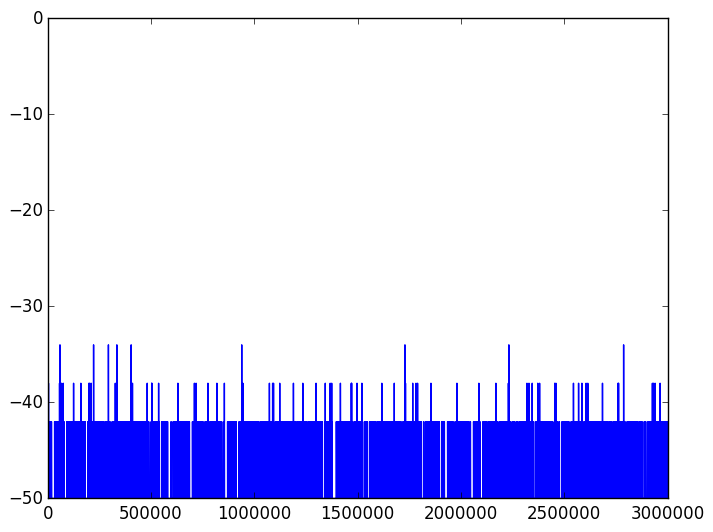

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9dcd6a2250>

In [41]:
energias=energias_t(1.0,5,5,3000000)
plot(energias,markersize=2)

In [157]:
energia_promedio(1.0,20,20,10000)

36.8696

(iii) Así, encuentra estimados de $\langle E \rangle_T$, y dibújalas como función de $T$.

(iv) Dibuja la energía *por espín* promedio en función de $T$ para distintos tamaños del sistema $L$, todas en una sola gráfica. ¿Qué observas?

[7] Repite lo mismo para la magnetización. ¿Qué observas? ¿Qué solución le podríamos dar? Hazlo. ¿Qué observas?